In [175]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

import pandas as pd
import numpy as np
import models.nestd
import os
import json
from theanomodels.utils.misc import loadHDF5

Populating the interactive namespace from numpy and matplotlib


## Find files named 'config.json' and load them into a dataframe

In [247]:
def extract_configs(rootdir,filename='config.json'):
    files = {}
    for dirpath, dirnames, filenames in os.walk(rootdir):
        if filename in filenames:
            with open(os.path.join(dirpath,filename),'r') as f:
                files[dirpath] = json.loads(f.read())
    return pd.DataFrame(files)

In [248]:
configs = extract_configs('output/')
configs.iloc[:5]

,output/001_ApproxM2/cw128_seed1,output/001_ExactM2/cw128_seed1,output/001_GumbelSoftmaxM2/cw128_seed1,output/001_LogGamma/cw128_seed1,output/001_LogisticNormal/cw128_seed1,output/001_LogisticNormalM2/cw128_seed1,output/001_STGumbelSoftmaxM2/cw128_seed1,output/002_10seeds/LogGamma/cw128_seed0,output/002_10seeds/LogGamma/cw128_seed1,output/002_10seeds/LogGamma/cw128_seed10,...,output/002_10seeds/LogGamma/cw128_seed4,output/002_10seeds/LogGamma/cw128_seed5,output/002_10seeds/LogGamma/cw128_seed6,output/002_10seeds/LogGamma/cw128_seed7,output/002_10seeds/LogGamma/cw128_seed8,output/002_10seeds/LogGamma/cw128_seed9,output/debug_cleanup/cw128_seed1,output/debug_cleanup2/cw128_seed1,output/debug_cleanup2/cw128_seed1x,output/debug_master
KL_loggamma_coef,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LogitNormalMP,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
alpha_inference_layers,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
annealBP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
annealBound,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Get differences between runs

In [249]:
keys_that_are_different = []
keys_to_omit = ['timestamp']
for k in configs.index:
    if k not in keys_that_are_different:
        if (configs.T.duplicated(k,keep='first')==False).sum()>1:
            keys_that_are_different.append(k)

In [250]:
configs.loc[keys_that_are_different].T

,model,posterior_c,posterior_val,savedir,seed,separateBNrunningstats,sharpening,timestamp,track_params
output/001_ApproxM2/cw128_seed1,ApproxM2,NaN,-6,output/001_ApproxM2/cw128_seed1,1,False,1,1.49517e+09,False
output/001_ExactM2/cw128_seed1,ExactM2,NaN,-6,output/001_ExactM2/cw128_seed1,1,False,1,1.49641e+09,False
output/001_GumbelSoftmaxM2/cw128_seed1,GumbelSoftmaxM2,NaN,-6,output/001_GumbelSoftmaxM2/cw128_seed1,1,False,10,1.49643e+09,False
output/001_LogGamma/cw128_seed1,LogGamma,-6,NaN,output/001_LogGamma/cw128_seed1,1,False,1,1.49473e+09,False
output/001_LogisticNormal/cw128_seed1,LogisticNormal,NaN,-6,output/001_LogisticNormal/cw128_seed1,1,False,1,1.49473e+09,False
output/001_LogisticNormalM2/cw128_seed1,LogisticNormalM2,NaN,-6,output/001_LogisticNormalM2/cw128_seed1,1,False,10,1.49643e+09,False
output/001_STGumbelSoftmaxM2/cw128_seed1,STGumbelSoftmaxM2,NaN,-6,output/001_STGumbelSoftmaxM2/cw128_seed1,1,False,1,1.49517e+09,False
output/002_10seeds/LogGamma/cw128_seed0,LogGamma,NaN,-6,output/002_10seeds/LogGamma/cw128_seed0,0,False,1,1.49651e+09,False
output/002_10seeds/LogGamma/cw128_seed1,LogGamma,NaN,-6,output/002_10seeds/LogGamma/cw128_seed1,1,False,1,1.49651e+09,False
output/002_10seeds/LogGamma/cw128_seed10,LogGamma,NaN,-6,output/002_10seeds/LogGamma/cw128_seed10,10,False,1,1.49651e+09,False


## Ignore list

In [251]:
configs = configs.loc[:,configs.loc['savedir'].str.contains('001')]

In [252]:
keys_that_are_different = []
keys_to_omit = ['timestamp']
for k in configs.index:
    if k not in keys_that_are_different:
        if (configs.T.duplicated(k,keep='first')==False).sum()>1:
            keys_that_are_different.append(k)

In [253]:
configs.loc[keys_that_are_different].T

,model,posterior_c,posterior_val,savedir,sharpening,timestamp
output/001_ApproxM2/cw128_seed1,ApproxM2,NaN,-6,output/001_ApproxM2/cw128_seed1,1,1.49517e+09
output/001_ExactM2/cw128_seed1,ExactM2,NaN,-6,output/001_ExactM2/cw128_seed1,1,1.49641e+09
output/001_GumbelSoftmaxM2/cw128_seed1,GumbelSoftmaxM2,NaN,-6,output/001_GumbelSoftmaxM2/cw128_seed1,10,1.49643e+09
output/001_LogGamma/cw128_seed1,LogGamma,-6,NaN,output/001_LogGamma/cw128_seed1,1,1.49473e+09
output/001_LogisticNormal/cw128_seed1,LogisticNormal,NaN,-6,output/001_LogisticNormal/cw128_seed1,1,1.49473e+09
output/001_LogisticNormalM2/cw128_seed1,LogisticNormalM2,NaN,-6,output/001_LogisticNormalM2/cw128_seed1,10,1.49643e+09
output/001_STGumbelSoftmaxM2/cw128_seed1,STGumbelSoftmaxM2,NaN,-6,output/001_STGumbelSoftmaxM2/cw128_seed1,1,1.49517e+09


## Generate a name-mapping

In [258]:
keys_to_always_include = [
    'model'
]
keys_to_always_ignore = [
    'timestamp',
    'savedir',
    'posterior_c',
    'posterior_val',
]
defaults = {
    'sharpening': 1
}
remap_name = {
    'sharpening': 'shrp'
}

def generate_name(key,value):
    if key in remap_name:
        rkey = remap_name[key]
    else:
        rkey = key
    if value is None or value==False:
        return ''
    elif key in defaults and value==defaults[key]:
        return ''
    elif value==True:
        return rkey
    elif key=='model':
        return value
    else:
        return '%s=%s' % (rkey,value)
    
name_map = {}
for c in configs.columns:
    name = configs.loc[list(set(keys_to_always_include+keys_that_are_different).difference(set(keys_to_always_ignore))),c]
    name_str_list = filter(len,map(generate_name,*zip(*name.iteritems())))
    name = ' '.join(name_str_list)
    name_map[c] = name

In [259]:
name_map

{'output/001_ApproxM2/cw128_seed1': u'ApproxM2',
 'output/001_ExactM2/cw128_seed1': u'ExactM2',
 'output/001_GumbelSoftmaxM2/cw128_seed1': u'shrp=10.0 GumbelSoftmaxM2',
 'output/001_LogGamma/cw128_seed1': u'LogGamma',
 'output/001_LogisticNormal/cw128_seed1': u'LogisticNormal',
 'output/001_LogisticNormalM2/cw128_seed1': u'shrp=10.0 LogisticNormalM2',
 'output/001_STGumbelSoftmaxM2/cw128_seed1': u'STGumbelSoftmaxM2'}

## Load results

In [260]:
results = models.nestd.NestD({name_map[k]:loadHDF5(os.path.join(k,'output.h5')) for k in name_map})

In [261]:
results.apply(np.shape)[:,'valid']

NestD{
 ExactM2: NestD{
   loss: (31,)
   p(x,y): NestD{
     nllX: (31,)
     nllY: (31,)
     logbeta: (31,)
     bound: (31,)
     KL: (31,)
     mu: (31,)
     logcov2: (31,)
     KL_Z: (31,)
     objfunc: (31,)
     Z: (31,)
     NLL: (31,)}
   boundU: (31,)
   bound: (31,)
   p(x): NestD{
     nllX: (31,)
     logbeta: (31,)
     bound: (31,)
     KL: (31,)
     mu: (31,)
     logcov2: (31,)
     KL_Y: (31,)
     KL_Z: (31,)
     objfunc: (31,)
     Z: (31,)
     NLL: (31,)}
   epoch: (31,)
   q(y|x): NestD{
     logbeta: (31,)}
   objective: (31,)
   boundL: (31,)
   classifier: (31,)
   duration (seconds): (31,)
   accuracy: (31,)}
 LogisticNormal: NestD{
   loss: (31,)
   p(x,y): NestD{
     nllX: (31,)
     nllY: (31,)
     logcov2_alpha: (31,)
     logit_alpha: (31,)
     KL_alpha: (31,)
     bound: (31,)
     KL: (31,)
     mu: (31,)
     eps: (31,)
     logcov2: (31,)
     KL_Z: (31,)
     mu_alpha: (31,)
     alpha: (31,)
     objfunc: (31,)
     Z: (31,)
     NLL: (31,)}

## Plotting Functions

In [262]:
def plot_result(x,y=None,label=None,title=None,best_val_func=None,best_val_format=None,**plt_kwargs): 
    if y is None:
        y = x
        x = np.arange(len(y))
    if label is not None and best_val_func is not None:
        best_val = best_val_format.format(best_val_func(y))
        label = '%s (%sep) %s' % (best_val,max(x),label)
    if label is not None:
        plt.plot(x,y,label=label,**plt_kwargs)
    else:
        plt.plot(x,y,**plt_kwargs)
        
def plot_parameters(legend_loc=None,xlim=None,ylim=None,xlabel=None,ylabel=None,**kwargs):
    if legend_loc is not None:
        plt.legend(**legend_loc)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    if xlim is not None:
        ply.xlim(*xlim)
        
        
def plot_experiment(results,keys=['accuracy','loss'],epoch_field='epoch',title=None,**kwargs):
    n = len(keys)
    plt.figure(figsize=(12,4),dpi=640)
    for i,k in enumerate(keys):
        plt.subplot(1,n,i+1)
        for s in results[:,k]:
            epochs = results[s,epoch_field]
            vals = results[s,k]
            plot_result(epochs,vals,label=s,**kwargs[k]['result_settings'])
        if title is None:
            plt.title(k)
        else:
            plt.title('%s\n%s' % (title,k))
        plot_parameters(**kwargs[k]['plot_parameters'])

## Plot Results

In [263]:
plot_settings = {
    'accuracy': {
        'result_settings': {
            'best_val_func': max,
            'best_val_format': '{:0.2f}',
        },
        'plot_parameters': {
            'legend_loc': {'loc':'lower right'},
            'ylim':(0.5,1),
        }
    },
    'loss': {
        'result_settings': {
            'best_val_func': min,
            'best_val_format': '{:0.1f}',
        },
        'plot_parameters': {
            'legend_loc': {'loc':'upper right'},
        }
    },
    
}

In [264]:
seaborn.set_palette(seaborn.color_palette("hls", len(results)))

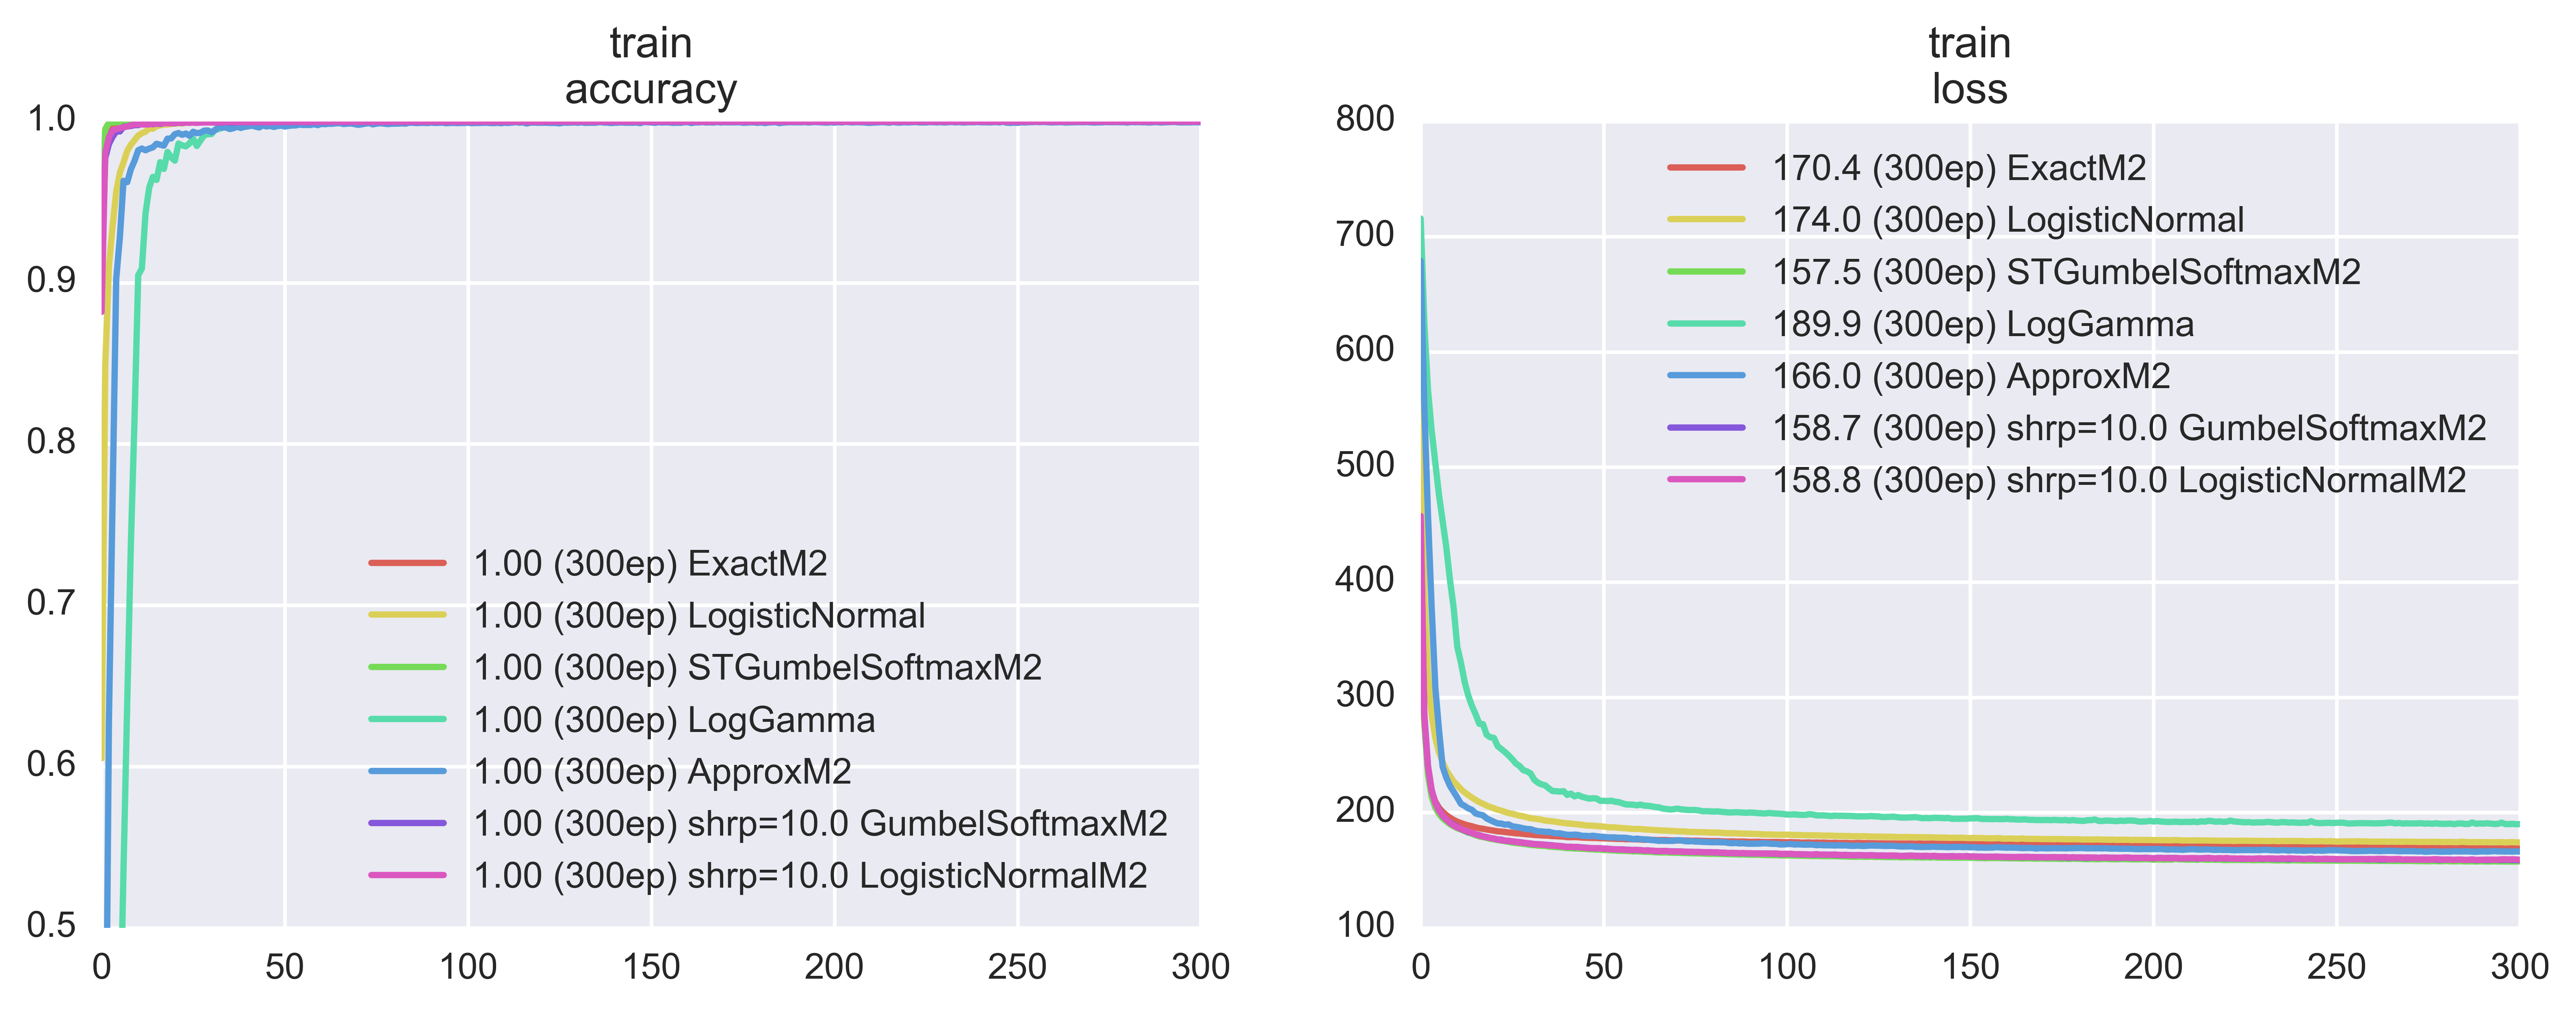

In [265]:
plot_experiment(results[:,'train'],title='train',**plot_settings)

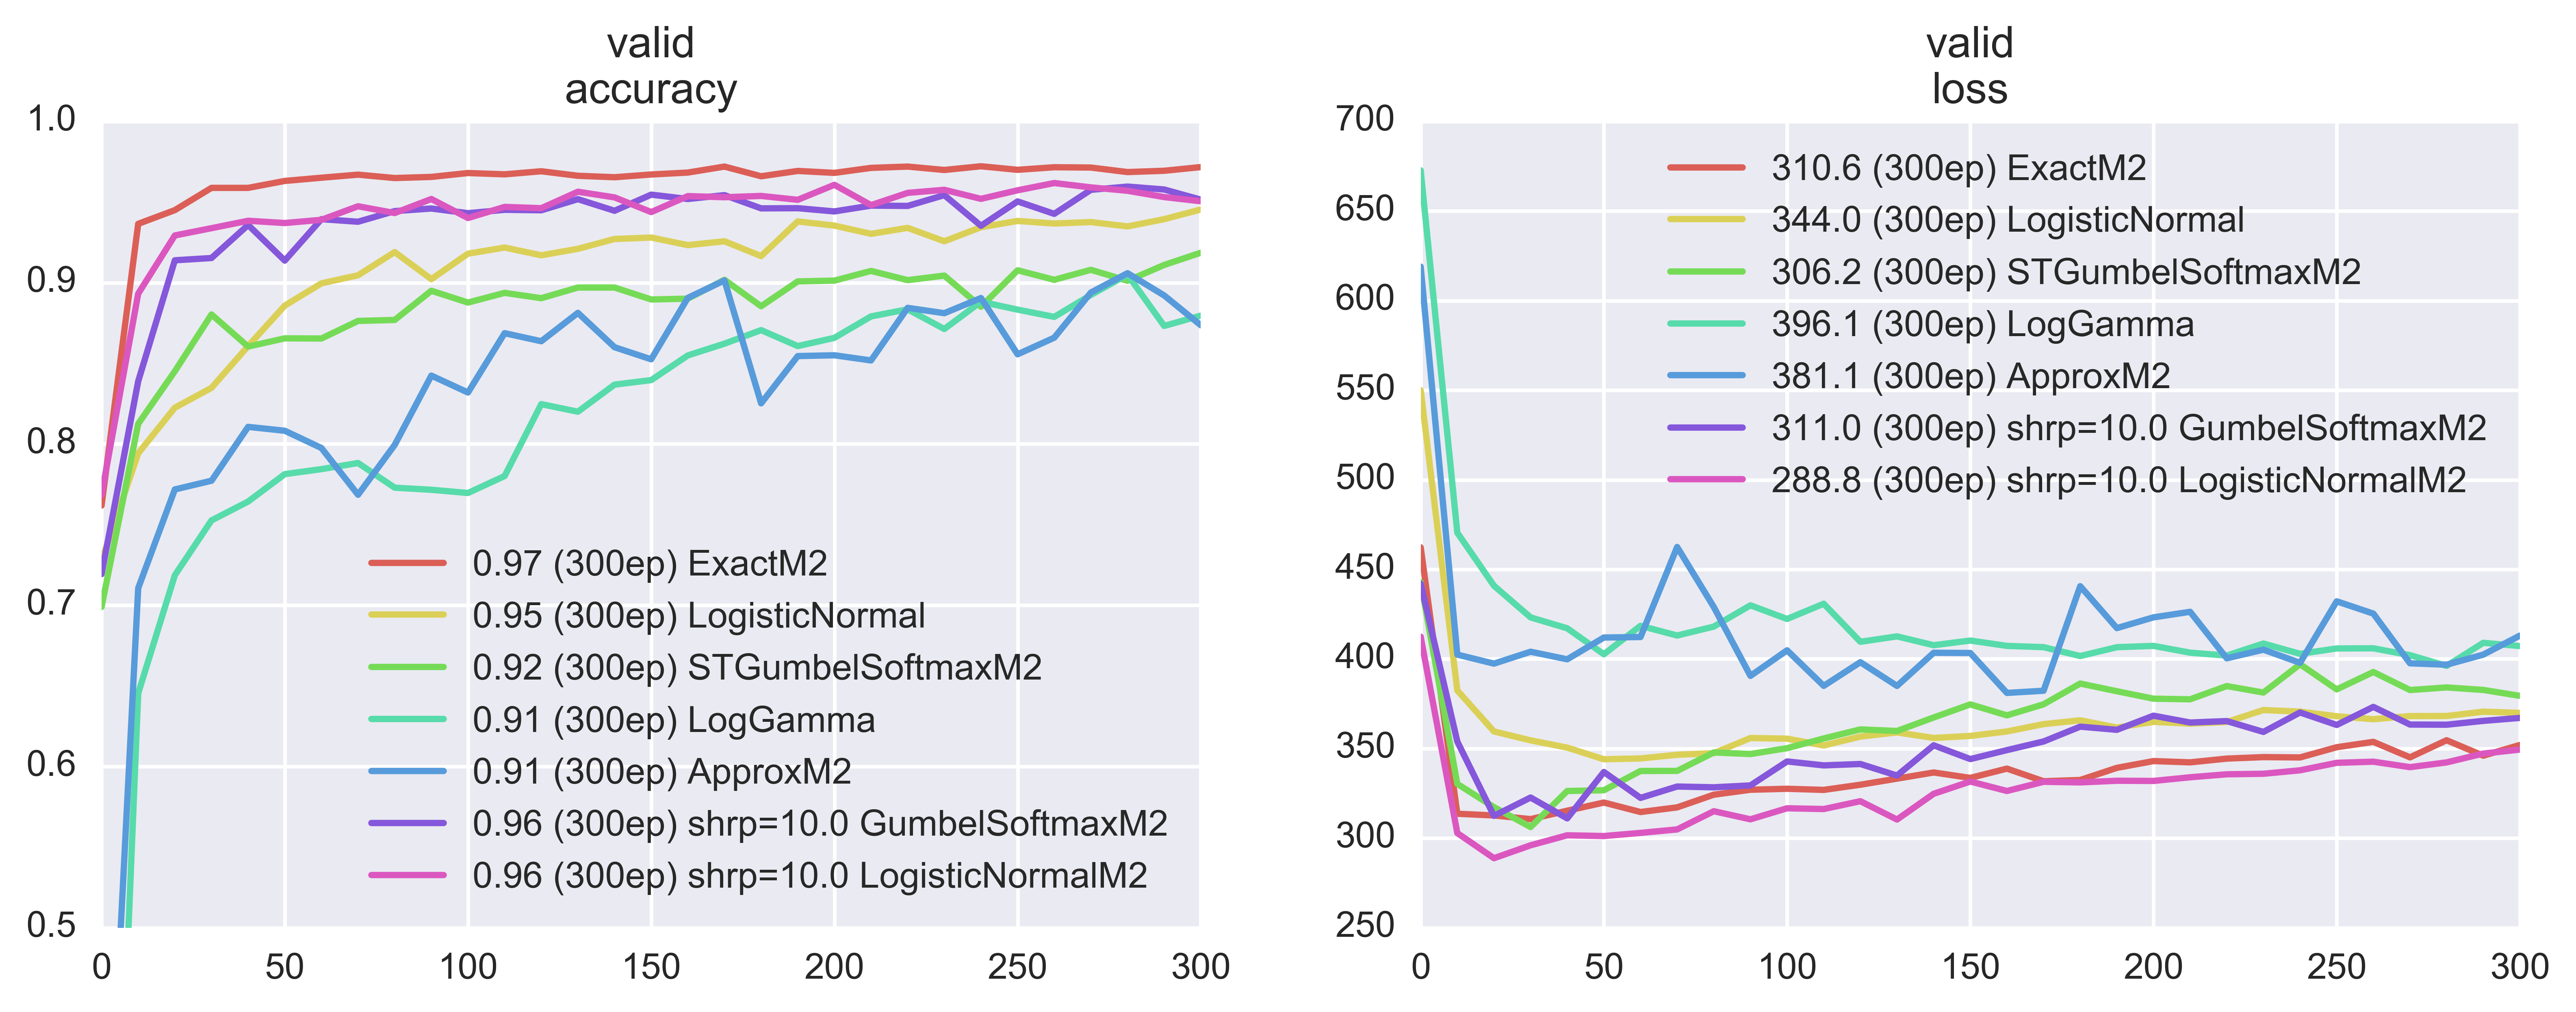

In [266]:
plot_experiment(results[:,'valid'],title='valid',**plot_settings)

In [267]:
2

2

In [268]:
def f1(h):
    return (2.+h)/2. - 0.5*(h**2.-4*h+12.)**0.5,(2.+h)/2. + 0.5*(h**2.-4*h+12.)**0.5

In [271]:
for h in range(-20,10):
    print h,f1(h)

-20 (-20.090536506409418, 2.0905365064094177)
-19 (-19.094810050208544, 2.0948100502085456)
-18 (-18.099504938362077, 2.0995049383620774)
-17 (-17.104686356149273, 2.104686356149273)
-16 (-16.1104335791443, 2.110433579144299)
-15 (-15.116843969807043, 2.116843969807043)
-14 (-14.12403840463596, 2.124038404635961)
-13 (-13.132168761236873, 2.1321687612368736)
-12 (-12.14142842854285, 2.1414284285428504)
-11 (-11.152067347825035, 2.152067347825035)
-10 (-10.164414002968975, 2.164414002968976)
-9 (-9.178908345800274, 2.1789083458002736)
-8 (-8.196152422706632, 2.196152422706632)
-7 (-7.216990566028302, 2.2169905660283016)
-6 (-6.242640687119285, 2.2426406871192848)
-5 (-5.274917217635375, 2.274917217635375)
-4 (-4.3166247903554, 2.3166247903554)
-3 (-3.3722813232690143, 2.3722813232690143)
-2 (-2.449489742783178, 2.449489742783178)
-1 (-1.5615528128088303, 2.5615528128088303)
0 (-0.7320508075688772, 2.732050807568877)
1 (0.0, 3.0)
2 (0.5857864376269049, 3.414213562373095)
3 (1.0, 4.0)
4 (

In [270]:
def f2(h):
    print (2.+h)/2.-(4.+h**2.)**0.5,(2.+h)/2.+(4.+h**2.)**0.5

In [273]:
for h in range(-10,10):
    print h,f2(h)

-10 -14.1980390272 6.19803902719
None
-9 -12.7195444573 5.71954445729
None
-8 -11.2462112512 5.24621125124
None
-7 -9.78010988928 4.78010988928
None
-6 -8.32455532034 4.32455532034
None
-5 -6.88516480713 3.88516480713
None
-4 -5.472135955 3.472135955
None
-3 -4.10555127546 3.10555127546
None
-2 -2.82842712475 2.82842712475
None
-1 -1.7360679775 2.7360679775
None
0 -1.0 3.0
None
1 -0.7360679775 3.7360679775
None
2 -0.828427124746 4.82842712475
None
3 -1.10555127546 6.10555127546
None
4 -1.472135955 7.472135955
None
5 -1.88516480713 8.88516480713
None
6 -2.32455532034 10.3245553203
None
7 -2.78010988928 11.7801098893
None
8 -3.24621125124 13.2462112512
None
9 -3.71954445729 14.7195444573
None
